<a href="https://colab.research.google.com/github/kushalmiglani01/ML/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:
# Load dataset
# Reading the dataset and making some mandatory data cleaning
path = "/content/datadump2.csv"


data = pd.read_csv(path, encoding='unicode_escape')
print("1. Input Dataset is loaded!")

# Ensuring column names have no non-alphanumeric characters
data.columns = [re.sub('[^0-9a-zA-Z]+', '_', i.strip()) for i in data.columns]
print("\n2. Column names have been formatted for usage. The updated column names are:")
print(data.columns.tolist())

# Printing data sample
print("\n3. Sample data records:")
display(data.head(2))

1. Input Dataset is loaded!

2. Column names have been formatted for usage. The updated column names are:
['RUN_ID', 'PLAN_ID', 'COMPILE_DESIGNATOR', 'ORGANIZATION_CODE', 'ITEM_CODE', 'CATEGORY_NAME', 'PLANNER_CODE', 'PLANNING_MAKE_BUY_CODE', 'BUYER_NAME', 'FIXED_DAYS_SUPPLY', 'FIXED_ORDER_QUANTITY', 'FIXED_LOT_MULTIPLIER', 'MINIMUM_ORDER_QUANTITY', 'MAXIMUM_ORDER_QUANTITY', 'ORDER_TYPE_TEXT', 'FIRM_PLANNED_TYPE', 'ACTION', 'RESCZEDULE_DAYS', 'DUE_DATE_DAYS_OUT', 'SOURCE_ORGANIZATION_CODE', 'SUPPLIER_NAME', 'SUPPLIER_SITE_CODE', 'ORDER_VALUE', 'QUANTITY_RATE', 'ORDER_NUMBER', 'NEW_ORDER_DATE', 'NEW_START_DATE', 'NEW_DUE_DATE', 'NEW_SZIP_DATE', 'NEW_DOCK_DATE', 'ORDER_TYPE', 'ORGANIZATION_ID', 'INVENTORY_ITEM_ID', 'TRANSACTION_ID', 'DISPOSITION_ID', 'CREATION_DATE', 'EXECUTED']

3. Sample data records:


,RUN_ID,PLAN_ID,COMPILE_DESIGNATOR,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNER_CODE,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,...,NEW_DUE_DATE,NEW_SZIP_DATE,NEW_DOCK_DATE,ORDER_TYPE,ORGANIZATION_ID,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,CREATION_DATE,EXECUTED
0,1000561,3077,MRPS,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,...,6/13/2024 0:00,6/11/2024 0:00,6/11/2024 0:00,1.0,5691.0,1607457.0,571531190.0,9438199.0,12/18/2023 0:00,N
1,1000561,3077,MRPS,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,...,4/12/2024 0:00,4/10/2024 0:00,4/10/2024 0:00,1.0,5691.0,1607457.0,571531191.0,9406204.0,12/18/2023 0:00,N


In [ ]:
single_value = ["PLAN_ID", "COMPILE_DESIGNATOR", "ORDER_TYPE_TEXT", "ORDER_TYPE"]

categorical = ["ORGANIZATION_CODE", "ITEM_CODE", "CATEGORY_NAME", "PLANNING_MAKE_BUY_CODE", "FIRM_PLANNED_TYPE",
               "ACTION", "ORGANIZATION_ID"]

text_column = ["PLANNER_CODE", "SUPPLIER_NAME", "SUPPLIER_SITE_CODE", "ORDER_NUMBER"]

categorical_t = categorical+text_column

continuous = ["FIXED_DAYS_SUPPLY", "FIXED_ORDER_QUANTITY", "FIXED_LOT_MULTIPLIER", "MINIMUM_ORDER_QUANTITY",
              "MAXIMUM_ORDER_QUANTITY", "RESCZEDULE_DAYS", "DUE_DATE_DAYS_OUT", "ORDER_VALUE", "QUANTITY_RATE",
              "INVENTORY_ITEM_ID", "TRANSACTION_ID", "DISPOSITION_ID"
             ]

dates = ["NEW_ORDER_DATE", "NEW_START_DATE", "NEW_DUE_DATE", "NEW_SZIP_DATE", "NEW_DOCK_DATE", "CREATION_DATE"]

no_values = ["SOURCE_ORGANIZATION_CODE"]

target = "EXECUTED"

In [ ]:
data.drop(columns=single_value, inplace=True)
data.head()

,RUN_ID,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNER_CODE,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,...,NEW_START_DATE,NEW_DUE_DATE,NEW_SZIP_DATE,NEW_DOCK_DATE,ORGANIZATION_ID,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,CREATION_DATE,EXECUTED
0,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,12/18/2023 0:00,6/13/2024 0:00,6/11/2024 0:00,6/11/2024 0:00,5691.0,1607457.0,571531190.0,9438199.0,12/18/2023 0:00,N
1,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,12/18/2023 0:00,4/12/2024 0:00,4/10/2024 0:00,4/10/2024 0:00,5691.0,1607457.0,571531191.0,9406204.0,12/18/2023 0:00,N
2,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,12/18/2023 0:00,3/5/2024 0:00,3/1/2024 0:00,3/1/2024 0:00,5692.0,1608687.0,571560659.0,9433211.0,12/18/2023 0:00,N
3,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,12/18/2023 0:00,1/25/2024 0:00,1/23/2024 0:00,1/23/2024 0:00,5692.0,1608687.0,571560660.0,9406330.0,12/18/2023 0:00,N
4,1000561,DEN,1001268431,FAB,FABRICATIO,BUY,Salman,5.0,NaN,NaN,...,12/18/2023 0:00,1/10/2024 0:00,1/9/2024 0:00,1/9/2024 0:00,5692.0,1608700.0,571554483.0,9418189.0,12/18/2023 0:00,N


In [ ]:
data.drop(columns=no_values, inplace=True)
data.head()

,RUN_ID,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNER_CODE,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,...,NEW_START_DATE,NEW_DUE_DATE,NEW_SZIP_DATE,NEW_DOCK_DATE,ORGANIZATION_ID,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,CREATION_DATE,EXECUTED
0,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,12/18/2023 0:00,6/13/2024 0:00,6/11/2024 0:00,6/11/2024 0:00,5691.0,1607457.0,571531190.0,9438199.0,12/18/2023 0:00,N
1,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,12/18/2023 0:00,4/12/2024 0:00,4/10/2024 0:00,4/10/2024 0:00,5691.0,1607457.0,571531191.0,9406204.0,12/18/2023 0:00,N
2,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,12/18/2023 0:00,3/5/2024 0:00,3/1/2024 0:00,3/1/2024 0:00,5692.0,1608687.0,571560659.0,9433211.0,12/18/2023 0:00,N
3,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,12/18/2023 0:00,1/25/2024 0:00,1/23/2024 0:00,1/23/2024 0:00,5692.0,1608687.0,571560660.0,9406330.0,12/18/2023 0:00,N
4,1000561,DEN,1001268431,FAB,FABRICATIO,BUY,Salman,5.0,NaN,NaN,...,12/18/2023 0:00,1/10/2024 0:00,1/9/2024 0:00,1/9/2024 0:00,5692.0,1608700.0,571554483.0,9418189.0,12/18/2023 0:00,N


In [ ]:
data.drop(columns=dates, inplace=True)
data.head()

,RUN_ID,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNER_CODE,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,...,SUPPLIER_NAME,SUPPLIER_SITE_CODE,ORDER_VALUE,QUANTITY_RATE,ORDER_NUMBER,ORGANIZATION_ID,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,EXECUTED
0,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,gar International L,CKVLLE TN,589.62,930.0,8081396( )(2)(1),5691.0,1607457.0,571531190.0,9438199.0,N
1,1000561,LAX,8078,WELD,MACZINED,BUY,Tom,10.0,NaN,NaN,...,gar International L,CKVLLE TN,760.80,1200.0,8046161( )(1)(1),5691.0,1607457.0,571531191.0,9406204.0,N
2,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,SING STAR ZYDRAULI,WATERTOWN SD,125.76,8.0,8080826( )(1)(1),5692.0,1608687.0,571560659.0,9433211.0,N
3,1000561,DEN,Z95545,FAB,FABRICATIO,BUY,Salman,10.0,NaN,NaN,...,SING STAR ZYDRAULI,WATERTOWN SD,125.76,8.0,8046287( )(7)(1),5692.0,1608687.0,571560660.0,9406330.0,N
4,1000561,DEN,1001268431,FAB,FABRICATIO,BUY,Salman,5.0,NaN,NaN,...,eal Ste,Knoxville TN,6649.92,144.0,8047797( )(16)(1),5692.0,1608700.0,571554483.0,9418189.0,N


In [ ]:
data.drop(columns=text_column, inplace=True)
data.head()

,RUN_ID,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,...,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,ORGANIZATION_ID,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,EXECUTED
0,1000561,LAX,8078,WELD,BUY,Tom,10.0,NaN,NaN,200.0,...,Reschedule Out,6.0,179.0,589.62,930.0,5691.0,1607457.0,571531190.0,9438199.0,N
1,1000561,LAX,8078,WELD,BUY,Tom,10.0,NaN,NaN,200.0,...,Reschedule Out,3.0,117.0,760.80,1200.0,5691.0,1607457.0,571531191.0,9406204.0,N
2,1000561,DEN,Z95545,FAB,BUY,Salman,10.0,NaN,NaN,8.0,...,Reschedule Out,7.0,79.0,125.76,8.0,5692.0,1608687.0,571560659.0,9433211.0,N
3,1000561,DEN,Z95545,FAB,BUY,Salman,10.0,NaN,NaN,8.0,...,Reschedule Out,5.0,39.0,125.76,8.0,5692.0,1608687.0,571560660.0,9406330.0,N
4,1000561,DEN,1001268431,FAB,BUY,Salman,5.0,NaN,NaN,24.0,...,Reschedule Out,13.0,24.0,6649.92,144.0,5692.0,1608700.0,571554483.0,9418189.0,N


In [ ]:
print(data["ORGANIZATION_CODE"].unique().tolist())
print(data["ORGANIZATION_ID"].unique().tolist())

['LAX', 'DEN', 'ORD']
[5691.0, 5692.0, 5730.0, nan]


In [ ]:
# Organisation code and indentity says the same thing, I will drop the ID
data.drop(columns=["ORGANIZATION_ID"], inplace=True)
data.head(1)

,RUN_ID,ORGANIZATION_CODE,ITEM_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,...,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,EXECUTED
0,1000561,LAX,8078,WELD,BUY,Tom,10.0,NaN,NaN,200.0,...,2.0,Reschedule Out,6.0,179.0,589.62,930.0,1607457.0,571531190.0,9438199.0,N


In [ ]:
print(len(data["ITEM_CODE"].unique().tolist()))
print(len(data["CATEGORY_NAME"].unique().tolist()))

4784
9


In [ ]:
# dropping item code for now as it is too much
data.drop(columns=["ITEM_CODE"], inplace=True)
data.head(1)

,RUN_ID,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,INVENTORY_ITEM_ID,TRANSACTION_ID,DISPOSITION_ID,EXECUTED
0,1000561,LAX,WELD,BUY,Tom,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,6.0,179.0,589.62,930.0,1607457.0,571531190.0,9438199.0,N


In [ ]:
IDS = ["INVENTORY_ITEM_ID", "TRANSACTION_ID", "DISPOSITION_ID"]
data.drop(columns=IDS, inplace=True)
data.head(1)

,RUN_ID,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED
0,1000561,LAX,WELD,BUY,Tom,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,6.0,179.0,589.62,930.0,N


In [ ]:
data.head()

,RUN_ID,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED
0,1000561,LAX,WELD,BUY,Tom,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,6.0,179.0,589.62,930.0,N
1,1000561,LAX,WELD,BUY,Tom,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,3.0,117.0,760.80,1200.0,N
2,1000561,DEN,FAB,BUY,Salman,10.0,NaN,NaN,8.0,NaN,2.0,Reschedule Out,7.0,79.0,125.76,8.0,N
3,1000561,DEN,FAB,BUY,Salman,10.0,NaN,NaN,8.0,NaN,2.0,Reschedule Out,5.0,39.0,125.76,8.0,N
4,1000561,DEN,FAB,BUY,Salman,5.0,NaN,NaN,24.0,NaN,2.0,Reschedule Out,13.0,24.0,6649.92,144.0,N


In [ ]:
data.drop(columns=["RUN_ID"], inplace=True)
data.head(1)

,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,BUYER_NAME,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED
0,LAX,WELD,BUY,Tom,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,6.0,179.0,589.62,930.0,N


In [ ]:
data.drop(columns=["BUYER_NAME"], inplace=True)
data.head(1)

,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,FIRM_PLANNED_TYPE,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED
0,LAX,WELD,BUY,10.0,NaN,NaN,200.0,NaN,2.0,Reschedule Out,6.0,179.0,589.62,930.0,N


In [ ]:
data["FIRM_PLANNED_TYPE"].unique()

array([ 2., nan])

In [ ]:
data.drop(columns=["FIRM_PLANNED_TYPE"], inplace=True)
data.head(1)

,ORGANIZATION_CODE,CATEGORY_NAME,PLANNING_MAKE_BUY_CODE,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,ACTION,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED
0,LAX,WELD,BUY,10.0,NaN,NaN,200.0,NaN,Reschedule Out,6.0,179.0,589.62,930.0,N


In [ ]:
category_col = ["ORGANIZATION_CODE", "CATEGORY_NAME", "PLANNING_MAKE_BUY_CODE", "ACTION"]

In [ ]:
continuous_col = ["FIXED_DAYS_SUPPLY", "FIXED_ORDER_QUANTITY", "FIXED_LOT_MULTIPLIER", "MINIMUM_ORDER_QUANTITY",
                  "MAXIMUM_ORDER_QUANTITY", "RESCZEDULE_DAYS", "DUE_DATE_DAYS_OUT", "ORDER_VALUE", "QUANTITY_RATE"]
y = ["EXECUTED"]

In [ ]:
data = pd.get_dummies(data, columns=category_col)

In [ ]:
data.head(3)

,FIXED_DAYS_SUPPLY,FIXED_ORDER_QUANTITY,FIXED_LOT_MULTIPLIER,MINIMUM_ORDER_QUANTITY,MAXIMUM_ORDER_QUANTITY,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED,...,CATEGORY_NAME_PAINT,CATEGORY_NAME_Und,CATEGORY_NAME_Undefined,CATEGORY_NAME_WELD,PLANNING_MAKE_BUY_CODE_BUY,PLANNING_MAKE_BUY_CODE_MAKE,ACTION_Cancel,ACTION_None,ACTION_Reschedule In,ACTION_Reschedule Out
0,10.0,NaN,NaN,200.0,NaN,6.0,179.0,589.62,930.0,N,...,0,0,0,1,1,0,0,0,0,1
1,10.0,NaN,NaN,200.0,NaN,3.0,117.0,760.80,1200.0,N,...,0,0,0,1,1,0,0,0,0,1
2,10.0,NaN,NaN,8.0,NaN,7.0,79.0,125.76,8.0,N,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data.isnull().sum()

FIXED_DAYS_SUPPLY                  49
FIXED_ORDER_QUANTITY           155176
FIXED_LOT_MULTIPLIER            89027
MINIMUM_ORDER_QUANTITY          30323
MAXIMUM_ORDER_QUANTITY         161084
RESCZEDULE_DAYS                     1
DUE_DATE_DAYS_OUT                   1
ORDER_VALUE                         1
QUANTITY_RATE                       1
EXECUTED                            1
ORGANIZATION_CODE_DEN               0
ORGANIZATION_CODE_LAX               0
ORGANIZATION_CODE_ORD               0
CATEGORY_NAME_ASSEMBLY              0
CATEGORY_NAME_CUT                   0
CATEGORY_NAME_ECOAT                 0
CATEGORY_NAME_FAB                   0
CATEGORY_NAME_LASER                 0
CATEGORY_NAME_PAINT                 0
CATEGORY_NAME_Und                   0
CATEGORY_NAME_Undefined             0
CATEGORY_NAME_WELD                  0
PLANNING_MAKE_BUY_CODE_BUY          0
PLANNING_MAKE_BUY_CODE_MAKE         0
ACTION_Cancel                       0
ACTION_None                         0
ACTION_Resch

In [ ]:
# calculate percent missing

missing_percent = data.isna().mean() * 100

# Calculate the percentage of non-missing values
non_missing_percent = 100 - missing_percent

In [ ]:
non_missing_percent

FIXED_DAYS_SUPPLY               99.969598
FIXED_ORDER_QUANTITY             3.719652
FIXED_LOT_MULTIPLIER            44.762395
MINIMUM_ORDER_QUANTITY          81.185821
MAXIMUM_ORDER_QUANTITY           0.053980
RESCZEDULE_DAYS                 99.999380
DUE_DATE_DAYS_OUT               99.999380
ORDER_VALUE                     99.999380
QUANTITY_RATE                   99.999380
EXECUTED                        99.999380
ORGANIZATION_CODE_DEN          100.000000
ORGANIZATION_CODE_LAX          100.000000
ORGANIZATION_CODE_ORD          100.000000
CATEGORY_NAME_ASSEMBLY         100.000000
CATEGORY_NAME_CUT              100.000000
CATEGORY_NAME_ECOAT            100.000000
CATEGORY_NAME_FAB              100.000000
CATEGORY_NAME_LASER            100.000000
CATEGORY_NAME_PAINT            100.000000
CATEGORY_NAME_Und              100.000000
CATEGORY_NAME_Undefined        100.000000
CATEGORY_NAME_WELD             100.000000
PLANNING_MAKE_BUY_CODE_BUY     100.000000
PLANNING_MAKE_BUY_CODE_MAKE    100

In [ ]:
# replace with mean for FIXED_DAYS_SUPPLY, MINIMUM_ORDER_QUANTITY
# DROP MAXIMUM_ORDER_QUANTITY and FIXED_ORDER_QUANTITY FIXED_LOT_MULTIPLIER

In [ ]:
data.drop(columns=["MAXIMUM_ORDER_QUANTITY", "FIXED_ORDER_QUANTITY", "FIXED_LOT_MULTIPLIER"], inplace=True)
data.head(1)

,FIXED_DAYS_SUPPLY,MINIMUM_ORDER_QUANTITY,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED,ORGANIZATION_CODE_DEN,ORGANIZATION_CODE_LAX,ORGANIZATION_CODE_ORD,...,CATEGORY_NAME_PAINT,CATEGORY_NAME_Und,CATEGORY_NAME_Undefined,CATEGORY_NAME_WELD,PLANNING_MAKE_BUY_CODE_BUY,PLANNING_MAKE_BUY_CODE_MAKE,ACTION_Cancel,ACTION_None,ACTION_Reschedule In,ACTION_Reschedule Out
0,10.0,200.0,6.0,179.0,589.62,930.0,N,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
replace_withmean = ["FIXED_DAYS_SUPPLY", "MINIMUM_ORDER_QUANTITY"]
for column in replace_withmean:
    data[column] = data[column].fillna(data[column].mean())

In [ ]:
# calculate percent missing

missing_percent = data.isna().mean() * 100
# Calculate the percentage of non-missing values
non_missing_percent = 100 - missing_percent
non_missing_percent

FIXED_DAYS_SUPPLY              100.00000
MINIMUM_ORDER_QUANTITY         100.00000
RESCZEDULE_DAYS                 99.99938
DUE_DATE_DAYS_OUT               99.99938
ORDER_VALUE                     99.99938
QUANTITY_RATE                   99.99938
EXECUTED                        99.99938
ORGANIZATION_CODE_DEN          100.00000
ORGANIZATION_CODE_LAX          100.00000
ORGANIZATION_CODE_ORD          100.00000
CATEGORY_NAME_ASSEMBLY         100.00000
CATEGORY_NAME_CUT              100.00000
CATEGORY_NAME_ECOAT            100.00000
CATEGORY_NAME_FAB              100.00000
CATEGORY_NAME_LASER            100.00000
CATEGORY_NAME_PAINT            100.00000
CATEGORY_NAME_Und              100.00000
CATEGORY_NAME_Undefined        100.00000
CATEGORY_NAME_WELD             100.00000
PLANNING_MAKE_BUY_CODE_BUY     100.00000
PLANNING_MAKE_BUY_CODE_MAKE    100.00000
ACTION_Cancel                  100.00000
ACTION_None                    100.00000
ACTION_Reschedule In           100.00000
ACTION_Reschedul

In [ ]:
continuous_col

['FIXED_DAYS_SUPPLY',
 'FIXED_ORDER_QUANTITY',
 'FIXED_LOT_MULTIPLIER',
 'MINIMUM_ORDER_QUANTITY',
 'MAXIMUM_ORDER_QUANTITY',
 'RESCZEDULE_DAYS',
 'DUE_DATE_DAYS_OUT',
 'ORDER_VALUE',
 'QUANTITY_RATE']

In [ ]:
numerical_cols = ["FIXED_DAYS_SUPPLY", "MINIMUM_ORDER_QUANTITY", 'RESCZEDULE_DAYS',
 'DUE_DATE_DAYS_OUT',
 'ORDER_VALUE',
 'QUANTITY_RATE']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data.head()

,FIXED_DAYS_SUPPLY,MINIMUM_ORDER_QUANTITY,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED,ORGANIZATION_CODE_DEN,ORGANIZATION_CODE_LAX,ORGANIZATION_CODE_ORD,...,CATEGORY_NAME_PAINT,CATEGORY_NAME_Und,CATEGORY_NAME_Undefined,CATEGORY_NAME_WELD,PLANNING_MAKE_BUY_CODE_BUY,PLANNING_MAKE_BUY_CODE_MAKE,ACTION_Cancel,ACTION_None,ACTION_Reschedule In,ACTION_Reschedule Out
0,0.45,0.001333,0.429224,0.395833,0.000195,0.003566,N,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0.45,0.001333,0.424658,0.266667,0.000252,0.004602,N,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0.45,0.000053,0.430746,0.187500,0.000042,0.000031,N,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.45,0.000053,0.427702,0.104167,0.000042,0.000031,N,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.20,0.000160,0.439878,0.072917,0.002200,0.000552,N,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data.EXECUTED.value_counts(dropna=False)

N      80594
Y      80576
NaN        1
Name: EXECUTED, dtype: int64

In [ ]:
# Target mapping
data = data[~data.EXECUTED.isnull()]

In [ ]:
# Creating mapping for the target variable for modelling purpose
y_mapping = {"N":False, "Y":True}
re_mapping = {v: k for k, v in y_mapping.items()}

data[y[0]] = data[y[0]].map(y_mapping)

data

,FIXED_DAYS_SUPPLY,MINIMUM_ORDER_QUANTITY,RESCZEDULE_DAYS,DUE_DATE_DAYS_OUT,ORDER_VALUE,QUANTITY_RATE,EXECUTED,ORGANIZATION_CODE_DEN,ORGANIZATION_CODE_LAX,ORGANIZATION_CODE_ORD,...,CATEGORY_NAME_PAINT,CATEGORY_NAME_Und,CATEGORY_NAME_Undefined,CATEGORY_NAME_WELD,PLANNING_MAKE_BUY_CODE_BUY,PLANNING_MAKE_BUY_CODE_MAKE,ACTION_Cancel,ACTION_None,ACTION_Reschedule In,ACTION_Reschedule Out
0,0.45,0.001333,0.429224,0.395833,0.000195,0.003566,False,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0.45,0.001333,0.424658,0.266667,0.000252,0.004602,False,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0.45,0.000053,0.430746,0.187500,0.000042,0.000031,False,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.45,0.000053,0.427702,0.104167,0.000042,0.000031,False,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.20,0.000160,0.439878,0.072917,0.002200,0.000552,False,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161165,0.45,0.001538,0.420091,0.245833,0.000198,0.000046,True,1,0,0,...,0,0,0,0,1,0,1,0,0,0
161166,0.45,0.001538,0.420091,0.245833,0.000561,0.000046,False,1,0,0,...,0,0,0,0,1,0,1,0,0,0
161167,0.45,0.001538,0.418569,0.056250,0.001121,0.000092,True,1,0,0,...,0,0,0,0,1,0,0,0,1,0
161168,0.45,0.001538,0.449011,0.179167,0.000561,0.000046,True,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
y[0]

'EXECUTED'

In [ ]:
data.to_csv("pre_processed.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = data.drop('EXECUTED', axis=1)  # Features (independent variables)
y = data['EXECUTED']               # Target variable (dependent variable)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=100000)

# Fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Create an RFE object
rfe = RFECV(model, min_features_to_select=10, n_jobs=-1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the selected features
print(rfe.support_)

# Print the ranking of the features
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True False False
 False False False False  True False False False False  True False False]
[ 1  1  1  1  1  1  1  1  1  1  8 13  3  6  9 12  1  5 11 10  7  1  2  4]


In [ ]:
rfe.cv_results_

{'mean_test_score': array([0.49805331, 0.49848763, 0.49909258, 0.49816188, 0.4979137 ,
        0.49871256, 0.49767328, 0.49771982, 0.49785165, 0.49818515,
        0.49855744, 0.49785166, 0.49805331, 0.49816189, 0.49805331]),
 'std_test_score': array([0.00173319, 0.00155349, 0.00166092, 0.00123877, 0.00167161,
        0.00207238, 0.00222522, 0.00153854, 0.00085123, 0.00134264,
        0.00113041, 0.00165501, 0.00171905, 0.00121671, 0.00191008]),
 'split0_test_score': array([0.49701412, 0.49798356, 0.498255  , 0.49771211, 0.49666512,
        0.49658756, 0.49507523, 0.4953079 , 0.49736311, 0.49713045,
        0.49709167, 0.49627734, 0.49600589, 0.49724678, 0.49588956]),
 'split1_test_score': array([0.50029084, 0.49823555, 0.49881723, 0.49769264, 0.49804165,
        0.49777019, 0.49722729, 0.49691705, 0.49672316, 0.49656804,
        0.49773142, 0.49676193, 0.49621903, 0.49660682, 0.49555978]),
 'split2_test_score': array([0.49866212, 0.4994377 , 0.50079497, 0.49893357, 0.49901113,
        

In [ ]:
y_pred_rfe = rfe.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f'Accuracy RFE: {accuracy_rfe:.2f}')

Accuracy RFE: 0.50


False    80594
True     80576
Name: EXECUTED, dtype: int64

In [ ]:
rfe.get_feature_names_out()

array(['FIXED_DAYS_SUPPLY', 'MINIMUM_ORDER_QUANTITY', 'RESCZEDULE_DAYS',
       'DUE_DATE_DAYS_OUT', 'ORDER_VALUE', 'QUANTITY_RATE',
       'ORGANIZATION_CODE_DEN', 'ORGANIZATION_CODE_LAX',
       'ORGANIZATION_CODE_ORD', 'CATEGORY_NAME_ASSEMBLY',
       'CATEGORY_NAME_Undefined', 'ACTION_None'], dtype=object)

In [ ]:
selected_features = list(rfe.get_feature_names_out())

In [ ]:
selected_features

['FIXED_DAYS_SUPPLY',
 'MINIMUM_ORDER_QUANTITY',
 'RESCZEDULE_DAYS',
 'DUE_DATE_DAYS_OUT',
 'ORDER_VALUE',
 'QUANTITY_RATE',
 'ORGANIZATION_CODE_DEN',
 'ORGANIZATION_CODE_LAX',
 'ORGANIZATION_CODE_ORD',
 'CATEGORY_NAME_ASSEMBLY',
 'CATEGORY_NAME_Undefined',
 'ACTION_None']

In [ ]:
X_train_rfe = X_train[selected_features]

In [ ]:
logreg.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
# !pip install statsmodels
import statsmodels.api as sm

logit_model = sm.Logit(y_train, X_train_rfe)

In [ ]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.693081
         Iterations 5


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               EXECUTED   No. Observations:               128936
Model:                          Logit   Df Residuals:                   128924
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:               9.385e-05
Time:                        11:08:03   Log-Likelihood:                -89363.
converged:                       True   LL-Null:                       -89372.
Covariance Type:            nonrobust   LLR p-value:                    0.1147
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FIXED_DAYS_SUPPLY           0.0006      0.033      0.017      0.986      -0.064       0.065
MINIMUM_ORDER_QUANTITY     -0.1499      0.497     -0.301      0.763      -1.125       0.825


None of the above features selected from the RFE of decision trees are statistically significant to explain the variations in the dependent variable

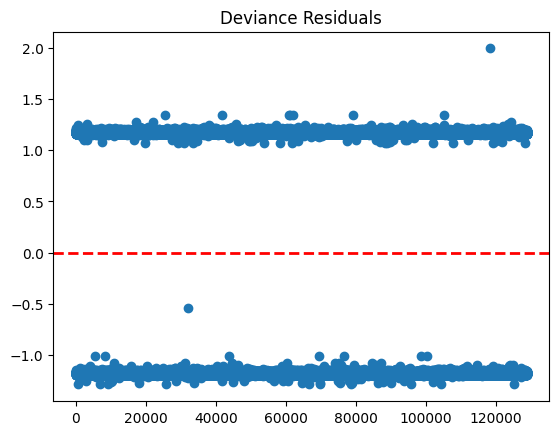

In [ ]:
# Get the residuals
residuals = result.resid_dev

import matplotlib.pyplot as plt
# Plot deviance residuals
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Deviance Residuals')
plt.show()

The deviance residuals test also show a pattern which indicates that there is a constant variance and not enough variation is present to determine the relationship as there is no randomness in the data